## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# __Importing Pandas/Numpy/Zipfile__

In [20]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pyplot as plt

# __Data #1 - TV Movies Budget (from class)__

In [4]:
## opening read file
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')

In [5]:
### removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

### removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

### removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [6]:
##creating new column release year

budget['release_year'] = pd.DatetimeIndex(budget['release_date']).year

In [7]:
### changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [8]:
## converting 'release_date' column type from integer to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [252]:
##renaming movie column to title
budget = budget.rename(columns = {"movie":"title"})

# _Data #1  - analyzing TV movies Budget_

In [10]:
#finding datset age range and ranges 105 years

oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])
movie_range = relativedelta(newest_movie, oldest_movie).years

print(oldest_movie)
print(newest_movie)
print(movie_range)

1915-02-08 00:00:00
2020-12-31 00:00:00
105


In [11]:
##defining and sorting top 20 grossing movies

top_gross_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(20)
top_gross_movies


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


# Data Source #2 - Top Rated Movies - pulled from TMBD API

In [24]:
import requests
import pandas as pd


# creating loop to pull 4000 records from top rated movies
# set page numbers
page = 1
total_pages = 400

# empty list
data_list = []

# loop to iterate
while page <= total_pages:
    # make a request to the API with the current page number
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=' + str(page))

    # response
    data = response.json()['results']
    # append data to list
    data_list.append(data)

    # increase page number
    page += 1

In [26]:
response.json().keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [51]:
# concatenate the data into a pandas DataFrame

top_movies = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)

In [52]:
#reindexing dataframe

top_movies = top_movies .reset_index(drop=True)

In [53]:
# saving data as csv file

top_movies.to_csv(r'\tmbd_top_4000_movies.csv', index=False)

In [54]:
# split the list into columns
split_movies = top_movies ['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_movies = pd.concat([top_movies, split_movies], axis=1)

In [55]:
#dropping null values

top_movies.dropna(axis=0, how='any', subset=['title'], inplace=True)

In [56]:
#dropping columns that aren't needed

top_movies = top_movies.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video',
                          'original_language', 'overview','col_7', 'col_8', 'col_9',], axis=1)

In [57]:
#renaming the genre columns
top_movies.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4', 'col_5':'genre_id_5', 'col_6':'genre_id_6'}, inplace = True)

In [58]:
##changing N/A variables to 0

top_movies = top_movies.fillna(0)

In [59]:
# converting  column type from float64 to int

top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']] = top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']].astype(int)

In [60]:
# changing title type to string
top_movies['title'] = top_movies['title'].astype('str')

In [61]:
##converting 'release_date' column type from integer to datetime

top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])

In [62]:
# information about first and last movie entry in data

first_movie = min(top_movies['release_date'])
last_movie = max(top_movies['release_date'])

print(first_movie)
print(last_movie)

1895-06-10 00:00:00
2023-03-01 00:00:00


In [116]:
top_movies.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,238,The Godfather,105.902,1972-03-14,The Godfather,8.7,17567,18,80,0,0,0,0
1,278,The Shawshank Redemption,82.189,1994-09-23,The Shawshank Redemption,8.7,23403,18,80,0,0,0,0
2,772071,Cuando Sea Joven,37.191,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,0,0
3,995133,"The Boy, the Mole, the Fox and the Horse",40.516,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,251,16,10751,12,14,0,0
4,240,The Godfather Part II,59.244,1974-12-20,The Godfather Part II,8.6,10636,18,80,0,0,0,0


# Data Source #2  - Analyzing & Visualizing

In [63]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8000 non-null   int64         
 1   original_title  8000 non-null   object        
 2   popularity      8000 non-null   float64       
 3   release_date    8000 non-null   datetime64[ns]
 4   title           8000 non-null   object        
 5   vote_average    8000 non-null   float64       
 6   vote_count      8000 non-null   int64         
 7   genre_id_1      8000 non-null   int64         
 8   genre_id_2      8000 non-null   int64         
 9   genre_id_3      8000 non-null   int64         
 10  genre_id_4      8000 non-null   int64         
 11  genre_id_5      8000 non-null   int64         
 12  genre_id_6      8000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 875.0+ KB


In [77]:
# creating df of most popular films by popularity

most_popular = top_movies.sort_values(by='popularity',ascending=False).head(20)

In [78]:
# creating new dataframe with only the top genres

top_genres = top_movies[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.Series.value_counts)

In [79]:
# changing N/A variables to 0
top_genres = top_genres.fillna(0)

In [80]:
# creating a genre total column that sums up the total values and making it a integer
top_genres['genre_total'] = top_genres.sum(axis=1)

In [81]:
# dropping first row
top_genres.drop([0],inplace=True)

In [94]:
# creating column with the genre names

top_genres['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror',
                            'Action','Comedy','History','Western','Thriller',
                            'Crime','Science Fiction', 'Mystery', 'Music','Romance',
                            'Family', 'War', 'TV Movie']

top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total,genre_name
12,451,425,250,90,24,5.0,1245.0,Adventure
14,172,270,230,155,59,6.0,892.0,Fantasy
16,506,241,104,15,4,2.0,872.0,Animation
18,2144,1411,484,113,15,2.0,4169.0,Drama
27,457,212,109,32,6,3.0,819.0,Horror
28,935,476,192,63,18,7.0,1691.0,Action
35,1525,754,345,112,26,2.0,2764.0,Comedy
36,44,238,148,44,5,0.0,479.0,History
37,65,28,20,14,3,2.0,132.0,Western
53,345,659,625,216,40,3.0,1888.0,Thriller


In [ ]:
top_genres['percent'] = ((top_genres['genre_total'] / top_genres['genre_total'].sum()) * 100)


In [95]:
# creating new df with only the genre ids to graph

top_genres_total= top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5','genre_id_6'])

In [96]:
##changing order of the columns

top_genres_total = top_genres_total [['genre_name', 'genre_total']]

In [97]:
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

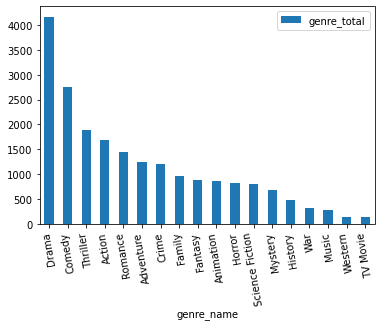

In [100]:
ax = top_genres_total.plot.bar(x='genre_name', y='genre_total', rot=100)

# Data Source #2 -  Analyzing Subgenres

In [101]:
# ADVENTURE DRAMA

#genre 1 - ADVENTURE

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - DRAMA
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([12]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_12 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_12.drop([i for i in merged_genre_18_12.columns if 'remove' in i],
               axis=1, inplace=True)

In [102]:
# COMEDY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - COMEDY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([35]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_35 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_35.drop([i for i in merged_genre_18_35.columns if 'remove' in i],
               axis=1, inplace=True)

In [103]:
# FANTASY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([14]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_14 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_14.drop([i for i in merged_genre_18_14.columns if 'remove' in i],
               axis=1, inplace=True)

In [104]:
# ROMANCE DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_10749.drop([i for i in merged_genre_18_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [105]:
# ACTION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ACTION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([28]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_28 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_28.drop([i for i in merged_genre_18_28.columns if 'remove' in i],
               axis=1, inplace=True)

In [106]:
# CRIME DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - CRIME
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([80]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_80 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_80.drop([i for i in merged_genre_18_80.columns if 'remove' in i],
               axis=1, inplace=True)

In [173]:
# THRILLER DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([53]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_53 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_53.drop([i for i in merged_genre_18_53.columns if 'remove' in i],
               axis=1, inplace=True)

In [179]:
# COMEDY ROMANCE

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_10749.drop([i for i in merged_genre_35_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [182]:
# creating new dataframe with lenths of sub-genres
genre_data = [len(merged_genre_18_12.index), len(merged_genre_18_35.index),
              len(merged_genre_18_14.index), len(merged_genre_18_10749.index), len(merged_genre_18_28.index),
              len(merged_genre_18_80.index),len(merged_genre_18_53.index),len(merged_genre_35_10749.index)]

genre_data_graph = pd.DataFrame(genre_data, columns = ['genre_total'])

# naming the columns based on the genre keys
no_drama = ['Adventure Drama', 'Comedy Drama', 'Fantasy Drama', 'Romance Drama', 'Action Drama','Crime Drama','Thriller Drama',
           'Comedy-Romance']

genre_data_graph['genre_name'] = no_drama

# re-arranging column position
moving_genre = genre_data_graph.pop('genre_name')
  
genre_data_graph.insert(0, 'genre_name', moving_genre)

In [183]:
# sorting by genre total
sub_genre_sorted = genre_data_graph.sort_values(by='genre_total',ascending=False)
sub_genre_sorted

,genre_name,genre_total
3,Romance Drama,988
1,Comedy Drama,956
6,Thriller Drama,923
7,Comedy-Romance,709
5,Crime Drama,687
4,Action Drama,501
0,Adventure Drama,291
2,Fantasy Drama,235


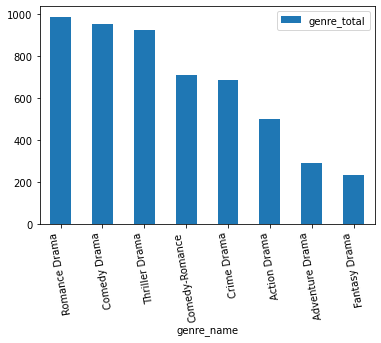

In [198]:
sub_genre_graph = sub_genre_sorted.plot.bar(x='genre_name', y='genre_total', rot=100)

# Data Source #2   - Looking at genres without 'Drama"

In [199]:
#creating dataframe from main top_genres and removing "drama" category as this might skew the data

top_genres_no_drama = top_genres_total

top_genres_no_drama = top_genres_no_drama.tail(-1)
top_genres_no_drama 

,genre_name,genre_total
35,Comedy,2764.0
53,Thriller,1888.0
28,Action,1691.0
10749,Romance,1447.0
12,Adventure,1245.0
80,Crime,1213.0
10751,Family,964.0
14,Fantasy,892.0
16,Animation,872.0
27,Horror,819.0


In [200]:
# creating percentage colum to represent breakdown of categories

genre_breakdown = top_genres_no_drama

genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum()) * 100)
genre_breakdown

<ipython-input-200-0e3223ff2fd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum()) * 100)


,genre_name,genre_total,percent
35,Comedy,2764.0,16.631566
53,Thriller,1888.0,11.360491
28,Action,1691.0,10.175101
10749,Romance,1447.0,8.706902
12,Adventure,1245.0,7.491425
80,Crime,1213.0,7.298875
10751,Family,964.0,5.800590
14,Fantasy,892.0,5.367351
16,Animation,872.0,5.247006
27,Horror,819.0,4.928094


In [201]:
# resestting index

genre_breakdown = genre_breakdown.reset_index()

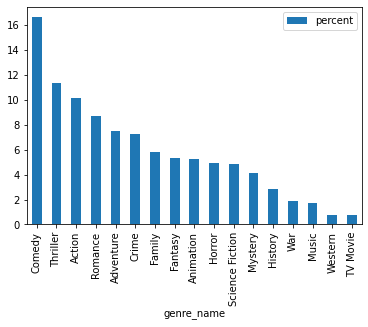

In [202]:
# creating preliminary graph representing the main genres when drama is removed

no_drama = genre_breakdown.plot.bar(x='genre_name', y='percent')

# Data Source #4 -  Box office revenue by genre - Numbers.com

In [212]:
#downloaded table from website and created .csv file

genre_data = pd.read_csv('top-movie-genres-by-total-box-office-revenue.csv')


In [213]:
genre_data['Genre']

0               Adventure
1                  Action
2                   Drama
3                  Comedy
4       Thriller/Suspense
5                  Horror
6         Romantic Comedy
7                 Musical
8             Documentary
9            Black Comedy
10                Western
11    Concert/Performance
12        Multiple Genres
13                Reality
14            Educational
Name: Genre, dtype: object

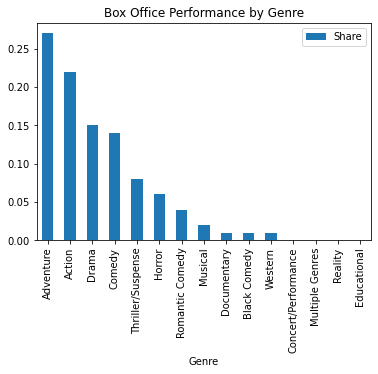

In [214]:
import matplotlib.pyplot as plt
import numpy as np

genre_data.plot.bar(x='Genre', y='Share')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_ylabel('Genre')
plt.title('Box Office Performance by Genre');

Text(0.5, 0, 'Ownership of Content')

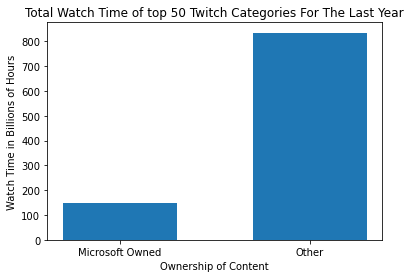

In [2]:
## Pulling in a Found data source of twitch data.  Generated on March 8th for the last 365 days
## Source of Data.  https://sullygnome.com/games/365/watched
import pandas as pd
import matplotlib.pyplot as plt

twitch=pd.read_csv('zippedData/MostWatchedTwitch.csv')
microsoftwatch=twitch[['Watch time (mins)', 'Game','Is_Microsoft_Owned']].groupby('Is_Microsoft_Owned').sum()
height2=microsoftwatch['Watch time (mins)']/1000000000
xa=microsoftwatch.index

fig,ax=plt.subplots()
plt.bar(xa,height2, width =.6)
ax.set_title("Total Watch Time of top 50 Twitch Categories For The Last Year")
ax.set_ylabel('Watch Time in Billions of Hours')
ax.set_xlabel('Ownership of Content')

Text(0.5, 0, 'Ownership of Content')

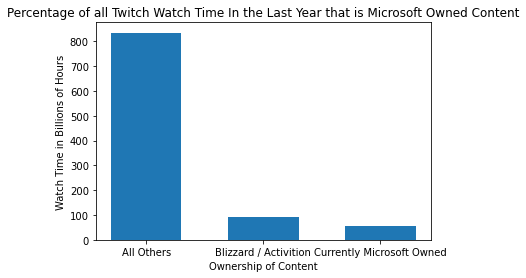

In [3]:
##Graph Showing the percentage of Top Twitch Content Microsoft is about to purchase

twitch=pd.read_csv('zippedData/MostWatchedTwitch.csv')
microsoftwatch=twitch[['Watch time (mins)', 'Game','Blizzard Title']].groupby('Blizzard Title').sum()
height2=microsoftwatch['Watch time (mins)']/1000000000
xa=microsoftwatch.index

fig,ax=plt.subplots()
plt.bar(xa,height2, width =.6)
ax.set_title("Percentage of all Twitch Watch Time In the Last Year that is Microsoft Owned Content")
ax.set_ylabel('Watch Time in Billions of Hours')
ax.set_xlabel('Ownership of Content')



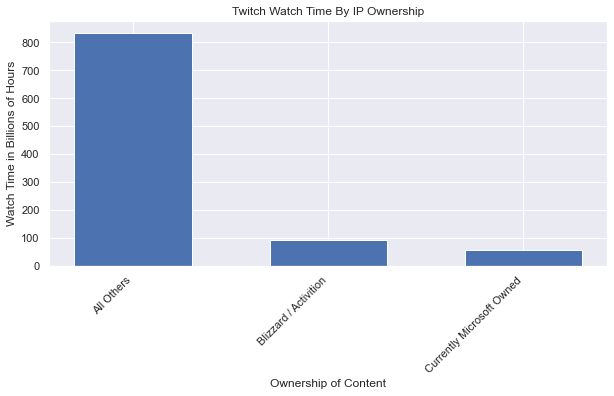

In [17]:
##Graph of Microsoft Owned Content Compared


twiblizact=twitch[['Watch time (mins)', 'Game','Blizzard Title']].groupby('Blizzard Title').sum()


height2=twiblizact['Watch time (mins)']/1000000000
xa=twiblizact.index

plt.rcParams["figure.figsize"] = (10,5)
fig,ax=plt.subplots()
plt.bar(xa,height2, width =.6)
ax.set_title("Twitch Watch Time By IP Ownership")
ax.set_ylabel('Watch Time in Billions of Hours')
ax.set_xlabel('Ownership of Content')
fig.autofmt_xdate(rotation=45)
sns.

plt.savefig('viewershipbreakdown.png', dpi=300, bbox_inches='tight')
# the plan is that I put a smaller graph overtop of the exisiting Graph.  one that is smaller but has different numbers yeah that doesnt work...

In [18]:
twiblizact

,Watch time (mins)
Blizzard Title,
All Others,8.352062e+11
Blizzard / Activition,9.236072e+10
Currently Microsoft Owned,5.510514e+10


In [14]:
## considering some of these are just chating, 


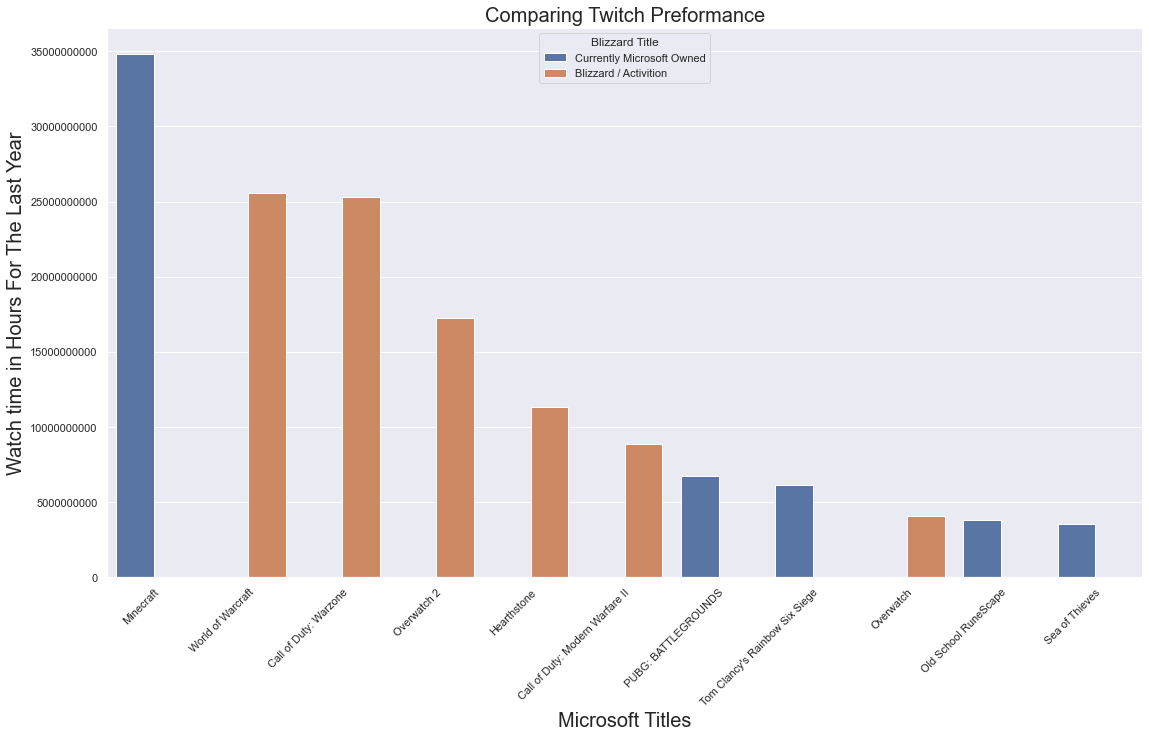

In [15]:
import seaborn as sns


comparingips=twitch.loc[twitch['Is_Microsoft_Owned']=='Microsoft Owned']


fig, ax = plt.subplots(figsize=(16,10))

plot=sns.barplot(x='Game', y='Watch time (mins)', data=comparingips, hue='Blizzard Title', ax=ax)
plt.setp(plot.get_xticklabels(), rotation=45)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
sns.set(font_scale=1)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
#ax.set(xlabel='Microsoft Titles', ylabel='Watch time in Hours For The Last Year',title='Comparing Twitch Preformance')
ax.set_xlabel('Microsoft Titles',fontsize=20)
ax.set_ylabel('Watch time in Hours For The Last Year',fontsize=20)
ax.axes.set_title('Comparing Twitch Preformance',fontsize=20)

plt.savefig('EachIP.png', dpi=300, bbox_inches='tight')



,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Is_Microsoft_Title,Is_Microsoft_Owned,Blizzard Title,Is_Exisiting_Microsoft_Content
6,Minecraft,3.481598e+10,1153558500,1702513,6347,2247356,66240,2194,30.18,TRUE,Microsoft Owned,Currently Microsoft Owned,Yes
9,World of Warcraft,2.558348e+10,660954720,800359,12297,253701,48674,1257,38.71,TRUE,Microsoft Owned,Blizzard / Activition,No
10,Call of Duty: Warzone,2.527280e+10,1366556880,618010,12842,1056393,48083,2599,18.49,TRUE,Microsoft Owned,Blizzard / Activition,No
13,Overwatch 2,1.723878e+10,657208800,633993,12678,1022873,32798,1250,26.23,TRUE,Microsoft Owned,Blizzard / Activition,No
22,Hearthstone,1.134687e+10,85080660,137028,687,74109,21588,161,133.37,TRUE,Microsoft Owned,Blizzard / Activition,No
24,Call of Duty: Modern Warfare II,8.860857e+09,1031669820,759147,22803,1421085,16858,1962,8.59,TRUE,Microsoft Owned,Blizzard / Activition,No
31,PUBG: BATTLEGROUNDS,6.751215e+09,359052540,169794,1390,315343,12844,683,18.80,TRUE,Microsoft Owned,Currently Microsoft Owned,Yes
32,Tom Clancy's Rainbow Six Siege,6.166365e+09,379602780,216741,2013,697085,11732,722,16.24,TRUE,Microsoft Owned,Currently Microsoft Owned,Yes
41,Overwatch,4.057929e+09,190350240,1459249,2725,264941,7720,362,21.32,TRUE,Microsoft Owned,Blizzard / Activition,No
44,Old School RuneScape,3.822005e+09,77826540,64684,594,39007,7271,148,49.11,TRUE,Microsoft Owned,Currently Microsoft Owned,Yes
